In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import networkx as nx
import pickle

In [35]:
df = pd.read_csv('./boxscores/boxscores.csv')
df['GAME_ID'] = df['GAME_ID'].astype(str)
df_boston = df[(df['TEAM_ABBREVIATION'] == 'BOS') & (df['GAME_ID'].str[1:3] == '21')] # Boston games
print(df_boston.columns)
df.head()

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE'],
      dtype='object')


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,21600002,1610612762,UTA,Utah,2207,Joe Johnson,Joe,F,NaN,30:30,...,9.5,0.844,0.859,0.286,0.285,94.58,92.85,77.38,59,0.243
1,21600002,1610612762,UTA,Utah,2564,Boris Diaw,Boris,F,NaN,32:10,...,11.1,0.125,0.125,0.138,0.136,92.11,89.54,74.62,60,-0.065
2,21600002,1610612762,UTA,Utah,203497,Rudy Gobert,Rudy,C,NaN,40:57,...,21.4,0.571,0.685,0.140,0.136,92.89,89.66,74.71,77,0.101
3,21600002,1610612762,UTA,Utah,203918,Rodney Hood,Rodney,G,NaN,37:39,...,0.0,0.618,0.677,0.238,0.233,95.11,92.43,77.03,72,0.127
4,21600002,1610612762,UTA,Utah,201588,George Hill,George,G,NaN,38:45,...,3.8,0.417,0.481,0.250,0.250,91.37,89.81,74.84,72,0.092


In [3]:
team_stats_df = pd.read_csv('./team_data/all_teams_game_stats.csv')
team_stats_df = team_stats_df.rename(columns={'Game_ID': 'GAME_ID'})
team_stats_df['GAME_ID'] = team_stats_df['GAME_ID'].astype(str)
team_stats_df

,GAME_ID,PTS,TEAM_ABBREVIATION
0,22101221,130,ATL
1,22101207,109,ATL
2,22101192,118,ATL
3,22101182,108,ATL
4,22101163,122,ATL
...,...,...,...
2629,22100055,120,CHA
2630,22100041,129,CHA
2631,22100035,111,CHA
2632,22100017,123,CHA


In [4]:
games = df_boston['GAME_ID'].unique()
len(games)

106

In [5]:
players = sorted(df_boston['PLAYER_NAME'].unique())
players

['Aaron Nesmith',
 'Al Horford',
 'Al-Farouq Aminu',
 'Brodric Thomas',
 'Bruno Fernando',
 'CJ Miles',
 'Daniel Theis',
 'Dennis Schroder',
 'Derrick White',
 'Enes Freedom',
 'Grant Williams',
 'Jabari Parker',
 'Jaylen Brown',
 'Jayson Tatum',
 'Joe Johnson',
 'Josh Richardson',
 'Juancho Hernangomez',
 'Justin Jackson',
 'Juwan Morgan',
 'Kelan Martin',
 'Luke Kornet',
 'Malik Fitts',
 'Marcus Smart',
 'Matt Ryan',
 'Nik Stauskas',
 'Norvel Pelle',
 'Payton Pritchard',
 'Robert Williams III',
 'Romeo Langford',
 'Sam Hauser']

In [6]:
METRIC = 'PIE'
avg_metric = dict()
for player in players:
    df_player = df_boston[df_boston['PLAYER_NAME'] == player]
    PM = df_player[METRIC].to_numpy()
    avg_metric[player] = np.nanmean(PM)

/scratch/3374722.1.csdata/ipykernel_1044263/2562418302.py:6: RuntimeWarning: Mean of empty slice
  avg_metric[player] = np.nanmean(PM)


In [7]:
with open('./BOS_avg_metric.pickle', 'wb') as file:
    pickle.dump(avg_metric, file)

In [8]:
print(f'==== average {METRIC} for each player ====')
for player in players:
    print(f'{player}: {avg_metric[player]}')

==== average PIE for each player ====
Aaron Nesmith: 0.040805970149253724
Al Horford: 0.1264891304347826
Al-Farouq Aminu: nan
Brodric Thomas: 0.024749999999999998
Bruno Fernando: 0.09565
CJ Miles: -0.091
Daniel Theis: 0.09683783783783784
Dennis Schroder: 0.08983673469387757
Derrick White: 0.07222448979591838
Enes Freedom: 0.11271428571428573
Grant Williams: 0.05829702970297029
Jabari Parker: 0.1045
Jaylen Brown: 0.13746666666666668
Jayson Tatum: 0.15232
Joe Johnson: 0.182
Josh Richardson: 0.07909090909090909
Juancho Hernangomez: -0.028277777777777773
Justin Jackson: 0.091
Juwan Morgan: 0.0321
Kelan Martin: -0.4836666666666667
Luke Kornet: 0.10138095238095238
Malik Fitts: 0.18241176470588238
Marcus Smart: 0.09183695652173915
Matt Ryan: 0.0
Nik Stauskas: -0.06310526315789472
Norvel Pelle: nan
Payton Pritchard: 0.05592631578947368
Robert Williams III: 0.13962820512820512
Romeo Langford: 0.09347727272727274
Sam Hauser: 0.025969696969696962


In [9]:
metric_dict = dict()
for p in players:
    metric_dict[p] = []

for game in games:
    df_game = df_boston[df_boston['GAME_ID'] == game]
    for player in players:
        pm = df_game[df_game['PLAYER_NAME'] == player][METRIC].to_numpy()
        if len(pm) == 0:
            metric_dict[player].append(np.nan)
        else:
            metric_dict[player].append(pm[0])

In [10]:
# Keep players that have played enough games
total_num_of_games = len(games)
print(total_num_of_games)
active_players = [p for p in players if np.count_nonzero(~np.isnan(metric_dict[p])) > total_num_of_games / 2]
active_players

106


['Aaron Nesmith',
 'Al Horford',
 'Grant Williams',
 'Jaylen Brown',
 'Jayson Tatum',
 'Marcus Smart',
 'Payton Pritchard',
 'Robert Williams III']

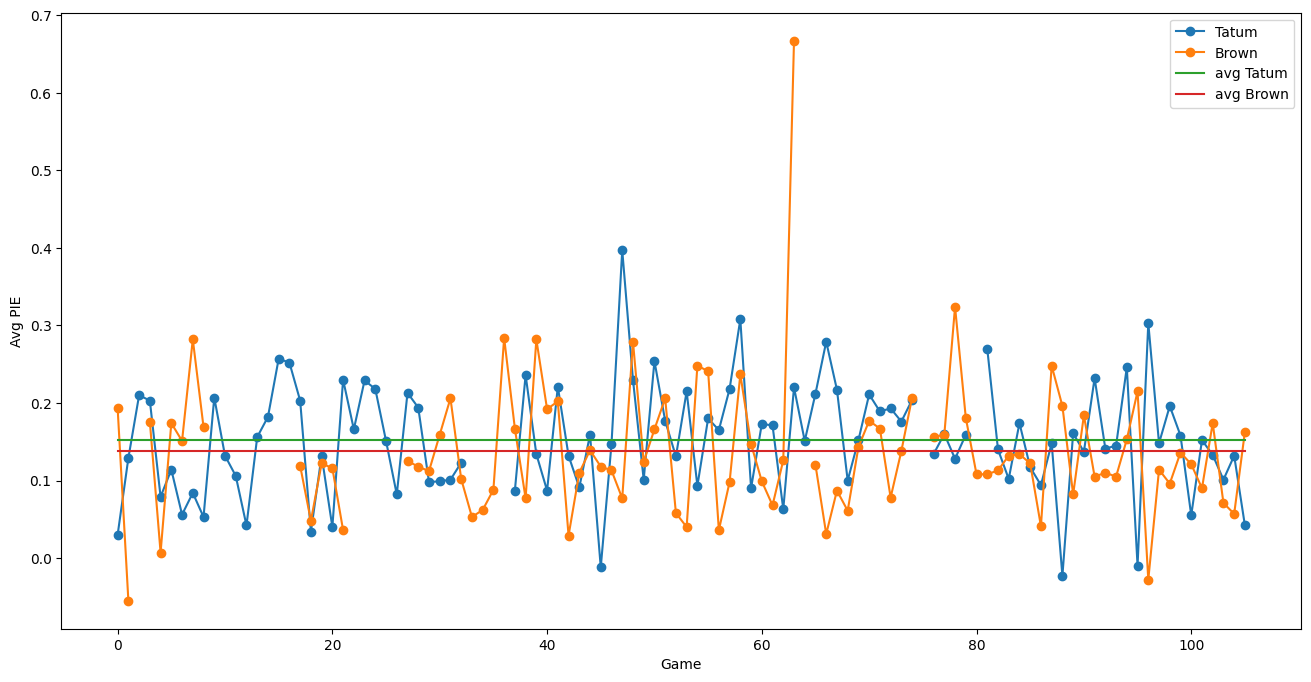

In [11]:
y_tatum = np.array(metric_dict['Jayson Tatum'])
y_brown = np.array(metric_dict['Jaylen Brown'])
y_smart = np.array(metric_dict['Marcus Smart'])
y_pritchard = np.array(metric_dict['Payton Pritchard'])
y_nesmith = np.array(metric_dict['Aaron Nesmith'])
y_williams = np.array(metric_dict['Grant Williams'])
y_horford = np.array(metric_dict['Al Horford'])

N = len(y_tatum)
xpoints = np.array(range(N))

style = '-o'

plt.figure(figsize=(16, 8))
plt.plot(xpoints, y_tatum, style, label='Tatum')
plt.plot(xpoints,  y_brown, style, label='Brown')
plt.plot(xpoints, [avg_metric['Jayson Tatum']] * N, '-', label='avg Tatum')
plt.plot(xpoints, [avg_metric['Jaylen Brown']] * N, '-', label='avg Brown')
plt.xlabel('Game')
plt.ylabel(f'Avg {METRIC}')
plt.legend()
plt.show()


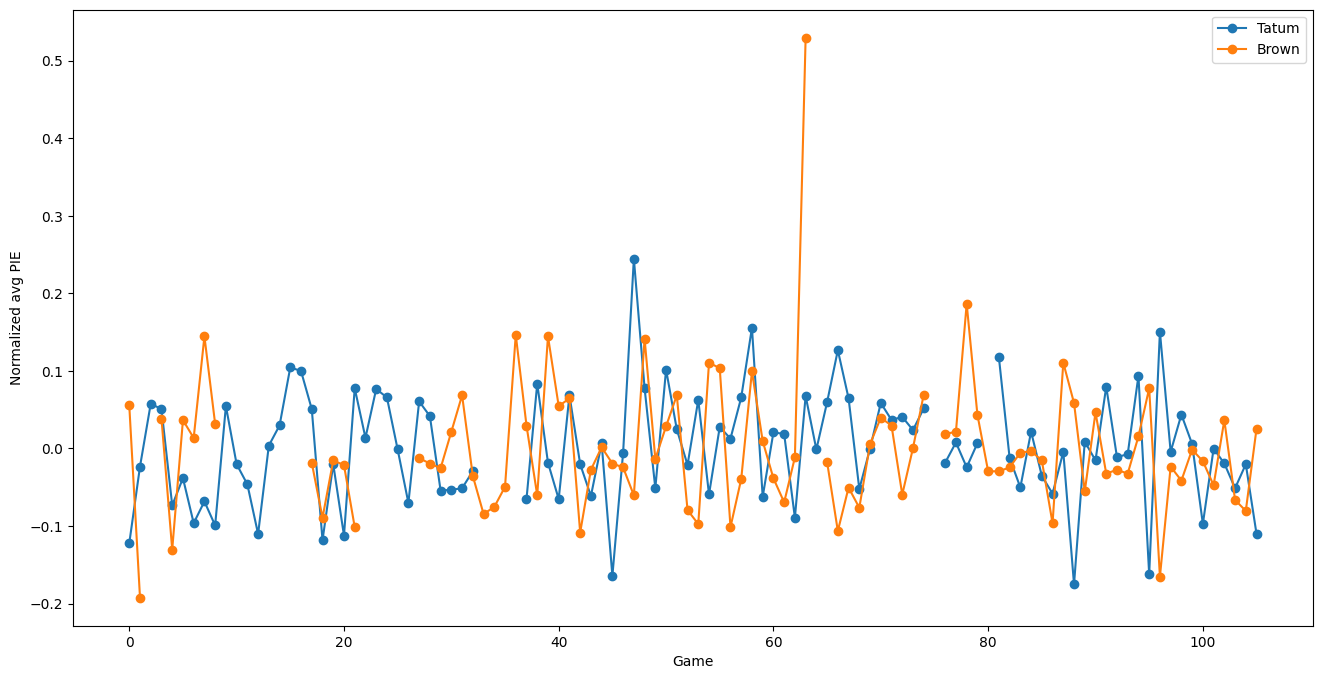

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(xpoints, y_tatum - avg_metric['Jayson Tatum'], style, label='Tatum')
plt.plot(xpoints,  y_brown - avg_metric['Jaylen Brown'], style, label='Brown')
plt.xlabel('Game')
plt.ylabel(f'Normalized avg {METRIC}')
plt.legend()
plt.show()

0.07242097486225935


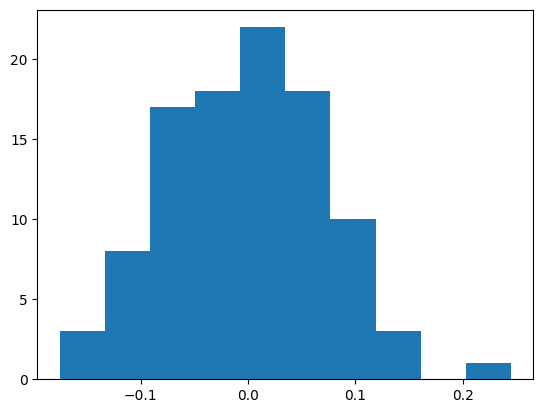

In [13]:
y_tatum_normalized = y_tatum - avg_metric['Jayson Tatum']
plt.hist(y_tatum - avg_metric['Jayson Tatum'])
print(np.nanstd(y_tatum_normalized))

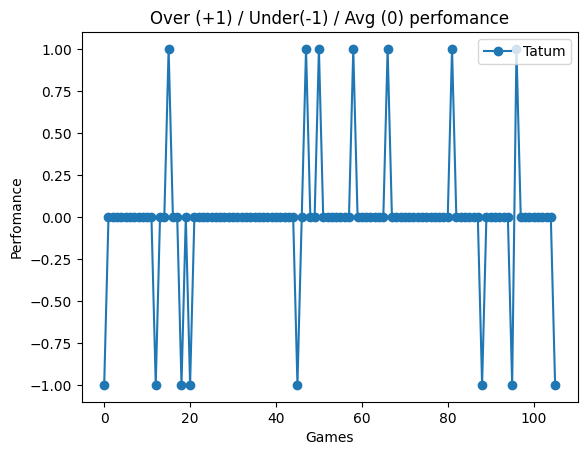

In [14]:
# over/under-performance
epsilon = 0.1
def addLabels(player_name, values, epsilon=0.2):
    min_val = min(values)
    adjusted_values = values - min_val
    adjusted_avg = avg_metric[player_name] - min_val
    return np.array([1 if val >  adjusted_avg + epsilon
            else -1 if val < adjusted_avg - epsilon
            else 0 for val in  adjusted_values])
labels_tatum = addLabels('Jayson Tatum', y_tatum, epsilon)
labels_brown = addLabels('Jaylen Brown', y_brown, epsilon)
labels_pritchard = addLabels('Payton Pritchard', y_pritchard, epsilon)
labels_nesmith = addLabels('Aaron Nesmith', y_nesmith, epsilon)
labels_williams = addLabels('Grant Williams', y_williams, epsilon)
labels_horford = addLabels('Al Horford', y_horford, epsilon)
player_labels = {p: addLabels(p, metric_dict[p] - avg_metric[p], epsilon) for p in active_players}

plt.title('Over (+1) / Under(-1) / Avg (0) perfomance')
plt.plot(xpoints, labels_tatum, style, label='Tatum')
plt.ylabel('Perfomance')
plt.xlabel('Games')
plt.legend()
plt.show()

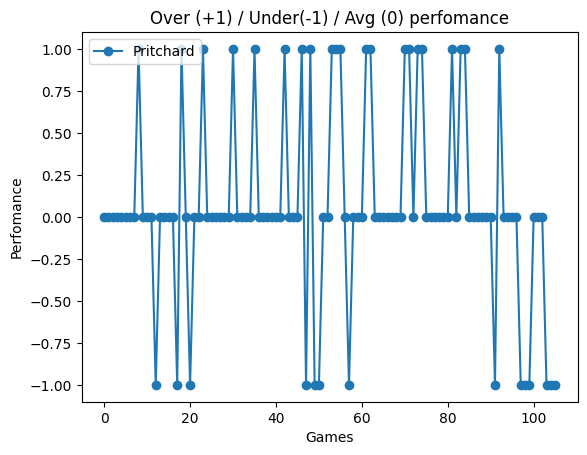

In [15]:
plt.title('Over (+1) / Under(-1) / Avg (0) perfomance')
plt.plot(xpoints, labels_pritchard, style, label='Pritchard')
plt.ylabel('Perfomance')
plt.xlabel('Games')
plt.legend()
plt.show()

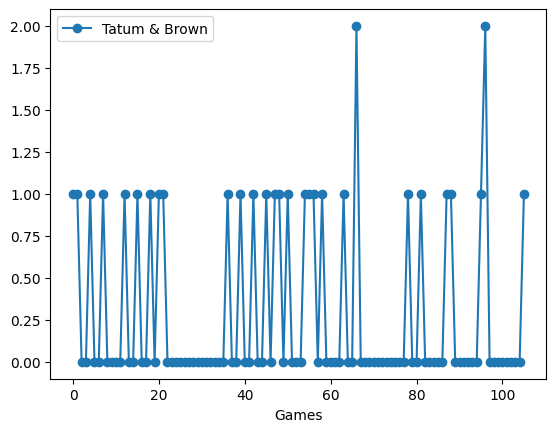

In [16]:
def joinLabels(labels1, labels2):
    return np.sqrt((labels1 - labels2)**2)
joined_labels = joinLabels(labels_tatum, labels_brown)
plt.plot(xpoints, joined_labels, style, label='Tatum & Brown')
plt.xlabel('Games')
plt.legend()
plt.show()

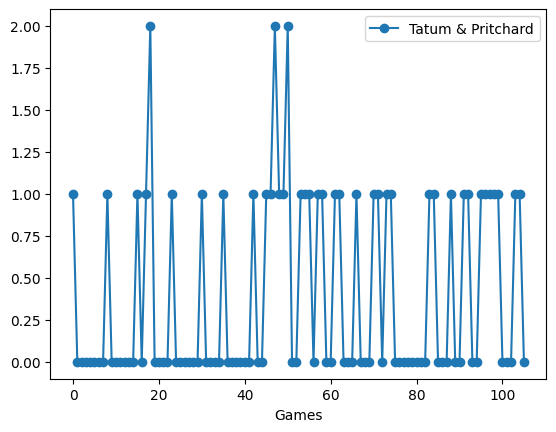

In [17]:
joined_labels = joinLabels(labels_tatum, labels_pritchard)
plt.plot(xpoints, joined_labels, style, label='Tatum & Pritchard')
plt.xlabel('Games')
plt.legend()
plt.show()

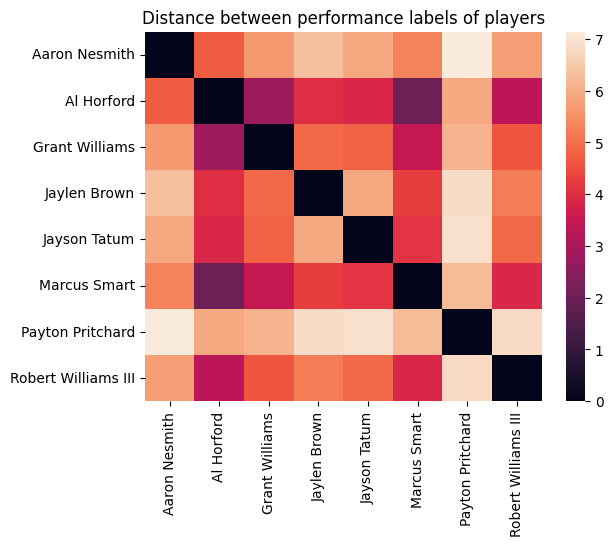

In [18]:
epsilon = 0.1
def dist(player1, player2, epsilon=0.1):
    vals1 = np.array(metric_dict[player1])
    vals2 = np.array(metric_dict[player2])
    
    labels1 = addLabels(player1, vals1, epsilon)
    labels2 = addLabels(player2, vals2, epsilon)
    
    diff = labels1 - labels2
    return np.linalg.norm(diff)

def correlation_matrix(players):
    matrix = []
    for p1 in players:
        for p2 in players:
            matrix.append(dist(p1, p2))

    matrix = np.array(matrix).reshape(len(players), len(players))
    heatmap = sns.heatmap(matrix, cbar=True, xticklabels=players, yticklabels=players)
    heatmap.set_xticklabels(players)
    heatmap.set_yticklabels(players)
    heatmap.set_title('Distance between performance labels of players')
    plt.show()
    
    return matrix

matrix = correlation_matrix(active_players)

In [19]:
print(dist('Jayson Tatum', 'Payton Pritchard'))
print(dist('Jaylen Brown', 'Jayson Tatum'))

6.928203230275509
5.916079783099616


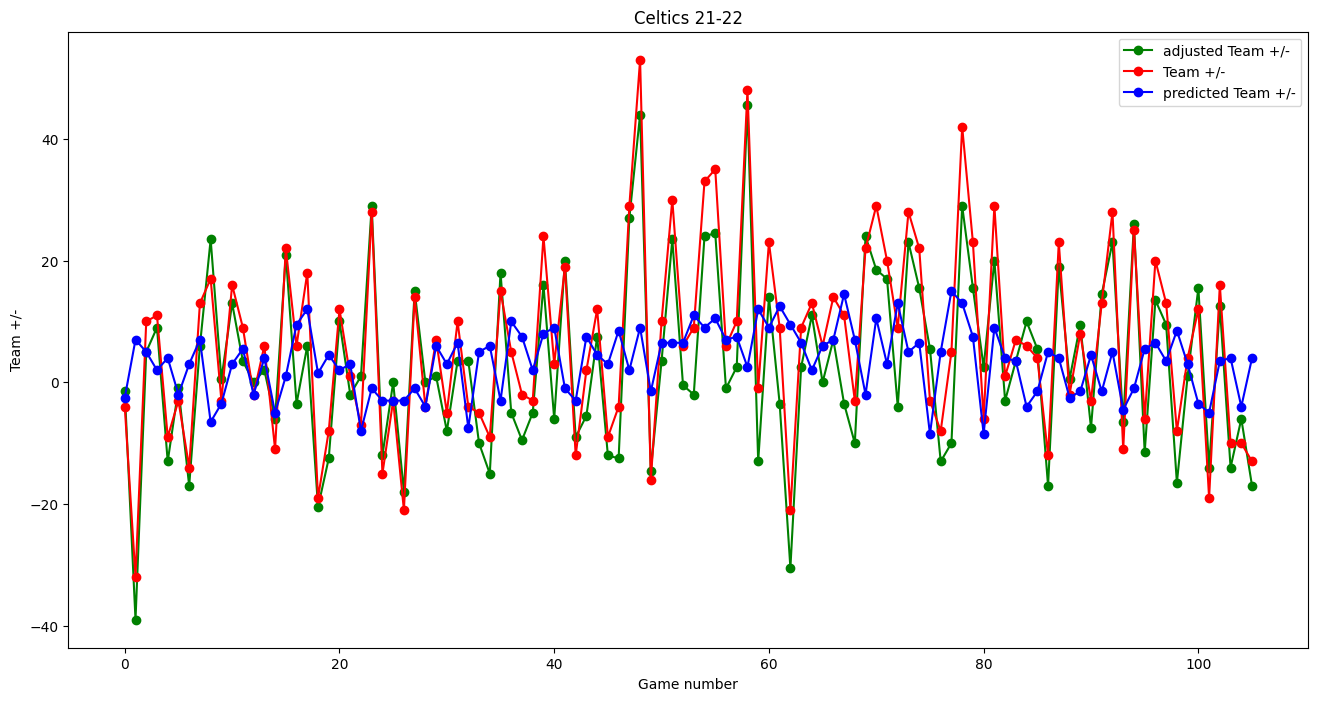

In [20]:
# def game_result(game_id, team1, team2):
#     points1 = team_stats_df[(team_stats_df['GAME_ID'] == game_id) & 
#                             (team_stats_df['TEAM_ABBREVIATION'] == team1)]['PTS'].to_numpy()[0]
#     points2 = team_stats_df[(team_stats_df['GAME_ID'] == game_id) & 
#                             (team_stats_df['TEAM_ABBREVIATION'] == team2)]['PTS'].to_numpy()[0]
#     return points1 - points2
    
# # Function to find teams for a given GAME_ID
# def find_teams_for_game(game_id, df):
#     game_info = df[df['GAME_ID'] == game_id]
#     if not game_info.empty:
#         teams = game_info['TEAM_ABBREVIATION'].unique()
#         return tuple(teams)
#     else:
#         return None

# result_dict = dict()
# for game in games:
#     team1, team2 = find_teams_for_game(game, team_stats_df)
#     if team1 != 'BOS': # team1 should be 'BOS'
#         team1, team2 = team2, team1
#     res = game_result(game, team1, team2)
#     result_dict[game] = res

# y_team = []
# y_team_labels = []
# for game in games:
#     y_team.append(result_dict[game])
#     y_team_labels.append(1 if result_dict[game] > 0 else -1)

df_predicted = pd.read_csv('./team_data/all_teams_predicted_results.csv')
predicted = df_predicted['BOS'].to_numpy()
df_actual = pd.read_csv('./team_data/all_teams_actual_results.csv')
actual = df_actual['BOS'].to_numpy()

threshold = 10
team_labels = []
for (actualDiff, predictedDiff) in zip(actual, predicted):
    if actualDiff > predictedDiff + threshold:
        team_labels.append(1)
    elif actualDiff  < predictedDiff - threshold:
        team_labels.append(-1)
    else:
        team_labels.append(0)

plt.figure(figsize=(16, 8))
plt.plot(xpoints,  actual - predicted, '-o', color='green', label='adjusted Team +/-')
plt.plot(xpoints, actual, '-o', color='red', label='Team +/-')
plt.plot(xpoints, predicted, '-o', color='blue', label='predicted Team +/-')
plt.xlabel('Game number')
plt.ylabel('Team +/-')
plt.title('Celtics 21-22')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(xpoints, team_labels, '--o', color='green', label='Celtics')
plt.plot(xpoints, labels_tatum, '--o', label='Tatum')
plt.plot(xpoints, labels_brown, '--o', label='Brown')
plt.xlabel('Game')
plt.ylabel(f'Labels')
plt.legend()
plt.show()

In [22]:
# distance of team over/under performance with individual over/under performance
team_players_correlation = np.array([np.linalg.norm(team_labels - player_labels[p]) for p in active_players])
plt.bar(active_players, team_players_correlation)
plt.xlabel('Player')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better visibility
plt.ylabel('Distance')
plt.title('Team - player performance label distance')
plt.show()

In [23]:
# largest possible team - player distance
worst_labels = np.array([-l if l != 0 else 1 for l in team_labels])
np.linalg.norm(team_labels - worst_labels)

In [24]:
# find the subset (1-3 players) of individuals that is the best predictor of team performance.

In [32]:
y_tatum

array([ 0.03 ,  0.129,  0.21 ,  0.203,  0.079,  0.114,  0.056,  0.084,
        0.053,  0.207,  0.132,  0.106,  0.042,  0.156,  0.182,  0.257,
        0.252,  0.203,  0.034,  0.132,  0.04 ,  0.23 ,  0.166,  0.229,
        0.218,  0.151,  0.082,  0.213,  0.194,  0.098,  0.099,  0.101,
        0.123,    nan,    nan,    nan,    nan,  0.087,  0.236,  0.134,
        0.087,  0.221,  0.132,  0.091,  0.159, -0.012,  0.147,  0.397,
        0.23 ,  0.101,  0.254,  0.177,  0.131,  0.215,  0.093,  0.18 ,
        0.165,  0.218,  0.308,  0.09 ,  0.173,  0.171,  0.063,  0.22 ,
        0.151,  0.212,  0.279,  0.217,  0.1  ,  0.152,  0.211,  0.189,
        0.193,  0.176,  0.204,    nan,  0.134,  0.16 ,  0.128,  0.159,
          nan,  0.27 ,  0.14 ,  0.102,  0.174,  0.117,  0.094,  0.148,
       -0.023,  0.161,  0.137,  0.232,  0.141,  0.145,  0.246, -0.01 ,
        0.303,  0.148,  0.196,  0.158,  0.055,  0.152,  0.133,  0.101,
        0.132,  0.042])

In [28]:
len(y_tatum)

106

In [29]:
games

array(['22100005', '22100020', '22100037', '22100041', '22100056',
       '22100078', '22100098', '22100110', '22100121', '22100136',
       '22100160', '22100175', '22100190', '22100199', '22100215',
       '22100232', '22100243', '22100256', '22100270', '22100287',
       '22100302', '22100322', '22100339', '22100347', '22100365',
       '22100378', '22100390', '22100408', '22100435', '22100445',
       '22100457', '22100471', '22100489', '22100503', '22100518',
       '22100529', '22100546', '22100570', '22100578', '22100595',
       '22100609', '22100618', '22100635', '22100647', '22100654',
       '22100671', '22100688', '22100699', '22100717', '22100737',
       '22100745', '22100762', '22100775', '22100788', '22100806',
       '22100817', '22100842', '22100856', '22100869', '22100875',
       '22100890', '22100905', '22100914', '22100927', '22100940',
       '22100960', '22100981', '22100997', '22101014', '22101042',
       '22101057', '22101068', '22101078', '22101087', '221011